
# Dataset Evaluation - Reduced Dataset
---

**Data was reduced by verification status**

In [1]:
import pandas as pd
import re
import string
import math

import matplotlib.pyplot as plt
import emoji

In [2]:
from textblob import TextBlob

---
### Importing the Dataset
---

In [3]:
# Importing the reduced data

df = pd.read_csv('stockerbot-export(Verified Tweets).csv',error_bad_lines=False)
df.head()

,id,text,timestamp,source,symbols,company_names,url,verified
0,1.019700e+18,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1.019710e+18,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True
2,1.019710e+18,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1.019720e+18,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True
4,1.019720e+18,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True


---
### Text Processing
---

In [4]:
df2 = df.copy(deep=True)

df2['tokens'] = df2['text'] 
df2.tokens = df2.tokens.str.lower()
df2.tokens = df2.tokens.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
df2.tokens = df2.tokens.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))
df2.tokens = df2.tokens.apply(lambda x: re.sub(r'{link}', '', x))
df2.tokens = df2.tokens.apply(lambda x: re.sub(r"\[video\]", '', x))
df2.tokens = df2.tokens.apply(lambda x: re.sub(r'&[a-z]+;', '', x))
df2.tokens = df2.tokens.apply(lambda x: re.sub(r'[@$#]+', '', x))
df2.tokens = df2.tokens.apply(lambda x: re.sub("([^\x00-\x7F])+"," ",x))  #Removed Chinese symbols



In [7]:
# Moving cleaned tweets to a sepearte dataframe
tweets = df2.drop(columns = ['timestamp', 'url','text'])
tweets.head()

,id,source,symbols,company_names,verified,tokens
0,1.019700e+18,GoldmanSachs,GS,The Goldman Sachs,True,video: i was in my office. i was minding my o...
1,1.019710e+18,StockTwits,M,Macy's,True,the price of lumber lb_f is down 22% since hit...
2,1.019710e+18,TheStreet,AIG,American,True,who says the american dream is dead?
3,1.019720e+18,MarketWatch,BTC,Bitcoin,True,barry silbert is extremely optimistic on bitco...
4,1.019720e+18,Forbes,ORCL,Oracle,True,how satellites avoid attacks and space junk wh...


---
### Sentiment Analysis
---

In [13]:
# get tweet subjectivity 
def tweet_subjectivity(tweets):
    return TextBlob(tweets).sentiment.subjectivity

# get tweet polarity
def tweet_polarity(tweets):
    return TextBlob(tweets).sentiment.polarity

#Add sentiment
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
tweets['Subjectivity'] = tweets['tokens'].apply(tweet_subjectivity)

tweets['Polarity'] = tweets['tokens'].apply(tweet_polarity)
  
tweets['Sentiment'] = tweets['Polarity'].apply(getSentiment)

print("\nNumber of tweets in the dataset: ",len(tweets))
tweets.head()


Number of tweets in the dataset:  363


,id,source,symbols,company_names,verified,tokens,Subjectivity,Polarity,Sentiment
0,1.019700e+18,GoldmanSachs,GS,The Goldman Sachs,True,video: i was in my office. i was minding my o...,1.000000,0.600000,Positive
1,1.019710e+18,StockTwits,M,Macy's,True,the price of lumber lb_f is down 22% since hit...,0.288889,-0.155556,Negative
2,1.019710e+18,TheStreet,AIG,American,True,who says the american dream is dead?,0.200000,-0.100000,Negative
3,1.019720e+18,MarketWatch,BTC,Bitcoin,True,barry silbert is extremely optimistic on bitco...,0.727273,0.005682,Positive
4,1.019720e+18,Forbes,ORCL,Oracle,True,how satellites avoid attacks and space junk wh...,0.000000,0.000000,Neutral


---
### Data Visualization
---

**Sentiment**

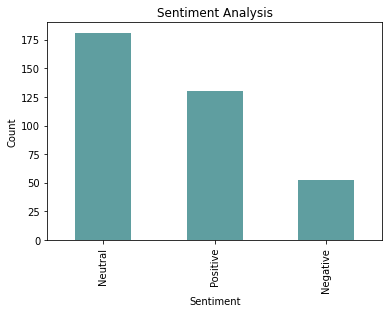

Neutral     181
Positive    130
Negative     52
Name: Sentiment, dtype: int64


In [9]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
tweets['Sentiment'].value_counts().plot(kind='bar', color='cadetblue')
plt.show()

print(tweets['Sentiment'].value_counts())

**Tweet Verification**

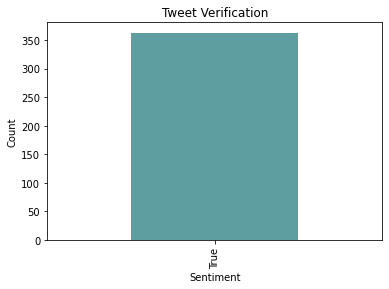

True    363
Name: verified, dtype: int64


In [10]:
plt.title('Tweet Verification')
plt.xlabel('Sentiment')
plt.ylabel('Count')
tweets['verified'].value_counts().plot(kind='bar', color='cadetblue')
plt.show()

print(tweets['verified'].value_counts())

**Company Names tagged in the tweets**

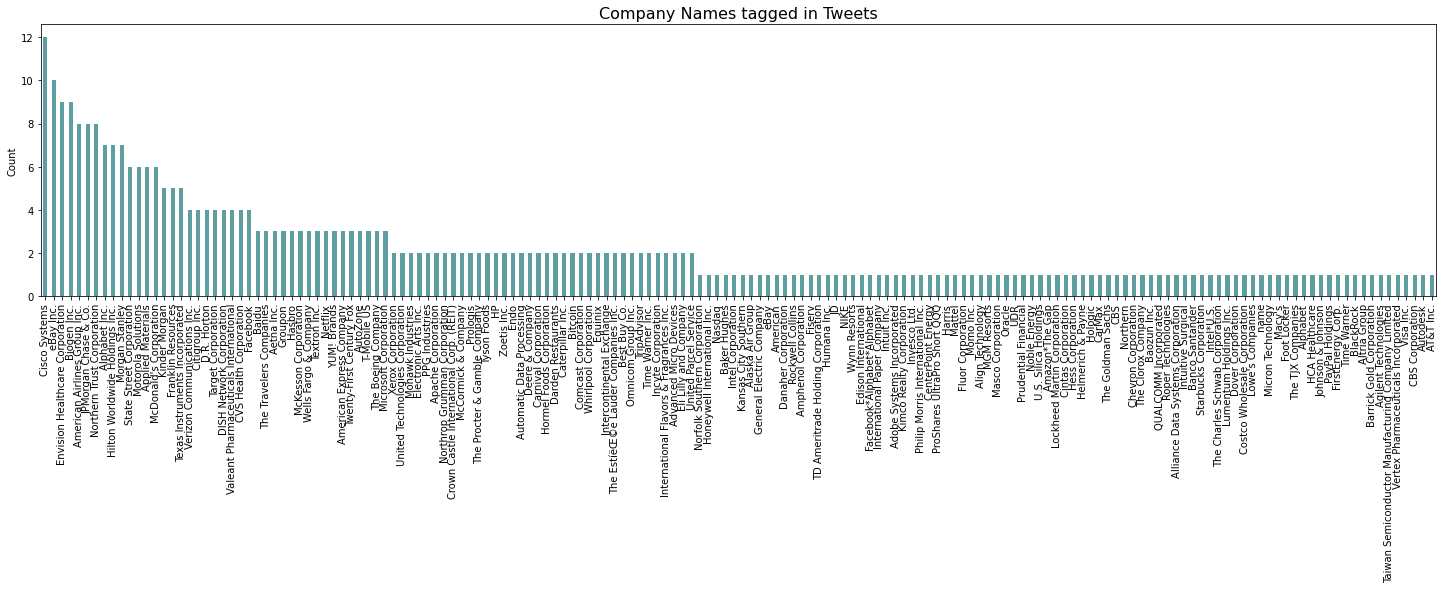

Cisco Systems                          12
eBay Inc.                              10
Envision Healthcare Corporation         9
Biogen Inc.                             9
American Airlines Group Inc.            8
                                       ..
Vertex Pharmaceuticals Incorporated     1
Visa Inc.                               1
CBS Corporation                         1
Autodesk                                1
AT&T Inc.                               1
Name: company_names, Length: 164, dtype: int64


In [14]:
plt.title('Company Names tagged in Tweets',fontsize=16)
# plt.xlabel('Comany Names')
plt.ylabel('Count')
tweets['company_names'].value_counts().plot(kind='bar', figsize=(25,5), color='cadetblue')
plt.show()
print(tweets['company_names'].value_counts())

**Sources of the tweets within the dataset**

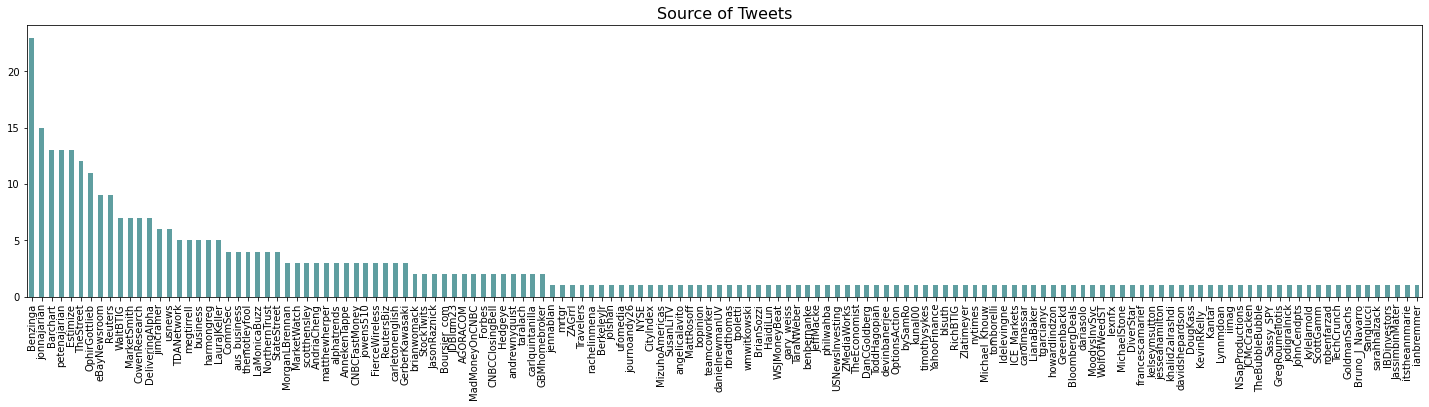

Benzinga          23
jonnajarian       15
Barchart          13
petenajarian      13
Estimize          13
                  ..
sarahhalzack       1
IBDinvestors       1
JassimbinMater     1
itstheannmarie     1
ianbremmer         1
Name: source, Length: 142, dtype: int64


In [15]:
plt.title('Source of Tweets',fontsize=16)
tweets['source'].value_counts().plot(kind='bar', figsize=(25,5), color='cadetblue')
plt.show()
print(tweets['source'].value_counts())